# References 

DATACAMP :: VISUALIZING TIME SERIES IN PYTHON       
[Autocorrelation](https://www.dummies.com/programming/big-data/data-science/autocorrelation-plots-graphical-technique-for-statistical-data/)



In [31]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
#print all rows of a df in ipython shell 
pd.set_option('display.max_rows', None)
#print all columns of a df in ipython shell 
pd.set_option('display.max_columns', None)

In [ ]:
# Binder upload
# 1. goto mybinder.com
# 2. add the github repository link, branch, filename, requirements.txt should be filled with dependencies
# 3. remove path from read_csv
# 4. share the link

# Data preparation

In [13]:
# load data
#path = 'e:/PycharmProjects/Datacamp/Visualizing_Time_Series_Data_in_Python/data'

path = os.path.abspath(os.getcwd())

# CHAPTER 1 ::
#file = path+'/diet.csv'
#df = pd.read_csv(file, skipinitialspace=True, delim_whitespace=True)

url_discoveries = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch1_discoveries.csv'

# CHAPTER 2 ::
file1 = path + '/data/ch2_co2_levels.csv'
co2_levels = pd.read_csv(file1,parse_dates=['datestamp'],index_col='datestamp')

# CHAPTER 3 ::
file2 = path + '/data/ch3_airline_passengers.csv'
airline = pd.read_csv(file2,parse_dates=['Month'],index_col='Month')

# CHAPTER 4 ::
#file2 = path + '/ch4_meat.csv'
#meat = pd.read_csv(file2,parse_dates=['date'],index_col='date')
url_meat = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch4_meat.csv'

# CHAPTER 5 :: CASE STUDY
url_jobs = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch5_employment.csv'


# Chapter 1 :: Getting started 

## Basic summary

In [16]:
# ex 1
# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv(url_discoveries)

# Display the first five lines of the DataFrame
print(discoveries.head(n=5))

# Print the data type of each column in discoveries
print(discoveries.dtypes)

# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0
date    object
Y        int64
dtype: object
date    datetime64[ns]
Y                int64
dtype: object


In [11]:
# ex 2
# basic summary
print(discoveries.head)
print(discoveries.columns)
print(discoveries.shape)
# count the null values
print(discoveries.isna().sum())

# count different values
#discoveries['column'].value_counts()

<bound method NDFrame.head of          date  Y
0  1860-01-01  5
1  1861-01-01  3
2  1862-01-01  0
3  1863-01-01  2
4  1864-01-01  0
..        ... ..
95 1955-01-01  1
96 1956-01-01  0
97 1957-01-01  0
98 1958-01-01  2
99 1959-01-01  0

[100 rows x 2 columns]>
Index(['date', 'Y'], dtype='object')
(100, 2)
date    0
Y       0
dtype: int64


## Basic visualisation

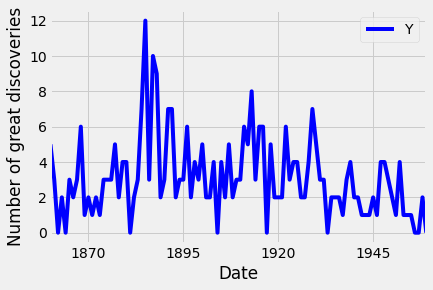

In [17]:
# ex 1
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

#  It looks like the largest number of great discoveries happened during the year of 1885.

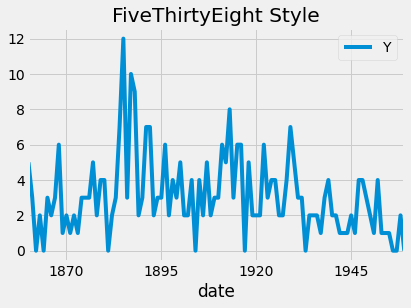

In [18]:
# ex 2
# Use style 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

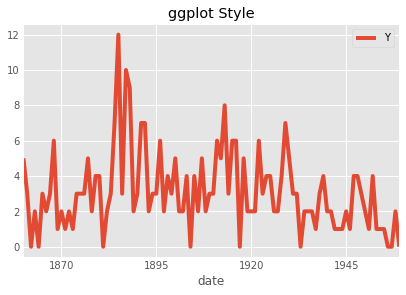

In [19]:
# ex 3
# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show()

## Display and label plots

As you saw earlier, if the index of a pandas DataFrame consists of dates, then pandas will automatically format the x-axis in a human-readable way. In addition the .plot() method allows you to specify various other parameters to tailor your time series plot (color of the lines, width of the lines and figure size).

You may have noticed the use of the notation ax = df.plot(...) and wondered about the purpose of the ax object. This is because the plot function returns a matplotlib AxesSubplot object, and it is common practice to assign this returned object to a variable called ax. Doing so also allows you to include additional notations and specifications to your plot such as axis labels.

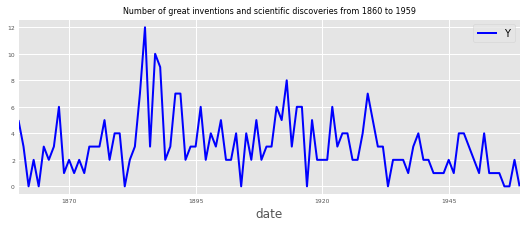

In [22]:
# ex 1
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

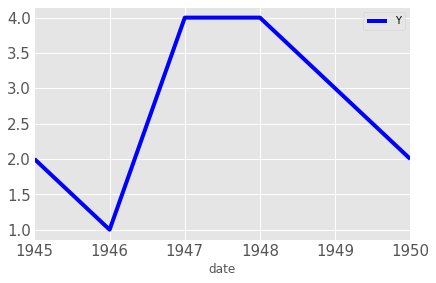

In [23]:
# ex 2
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945':'1950']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show()

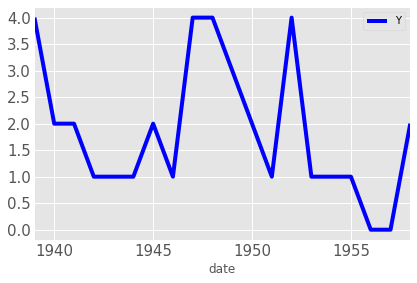

In [24]:
# ex 3
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939':'1958']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show()

## Add vertical and horizontal markers

Additional annotations can help further emphasize specific observations or events. Here, you will learn how to highlight significant events by adding markers at specific timestamps of your time series plot. The matplotlib library makes it possible to draw vertical and horizontal lines to identify particular dates.

Recall that the index of the discoveries DataFrame are of the datetime type, so the x-axis values of a plot will also contain dates, and it is possible to directly input a date when annotating your plots with vertical lines. For example, a vertical line at January 1, 1945 can be added to your plot by using the command:

```
ax.axvline('1945-01-01', linestyle='--')
```

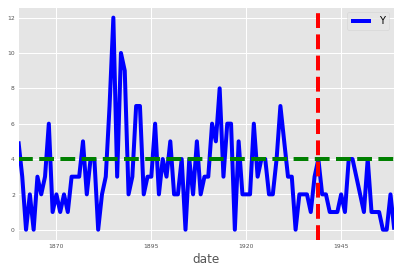

In [25]:
# ex 1
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show()

## Add shaded regions to your plot

When plotting time series data in Python, it is also possible to highlight complete regions of your time series plot. In order to add a shaded region between January 1, 1936 and January 1, 1950, you can use the command:

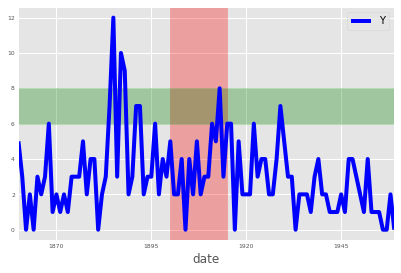

In [26]:
# ex 1
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()

# Chapter 2 :: Summarizing and describing time series data

## Basic summary

In [30]:
# ex 1
# Display first seven rows of co2_levels
print(co2_levels.head(7))

# Print out the number of missing values
print(co2_levels.isnull().sum())

              co2
datestamp        
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4
1958-05-03  316.9
1958-05-10    NaN
co2    59
dtype: int64


## Missing values

In [ ]:
# ex 1
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isna())

## Display rolling averages

It is also possible to visualize rolling averages of the values in your time series. This is equivalent to "smoothing" your data, and can be particularly useful when your time series contains a lot of noise or outliers. For a given DataFrame df, you can obtain the rolling average of the time series by using the command:

df_mean = df.rolling(window=12).mean()

The window parameter should be set according to the granularity of your time series. For example, if your time series contains daily data and you are looking for rolling values over a whole year, you should specify the parameter to window=365. In addition, it is easy to get rolling values for other other metrics, such as the standard deviation (.std()) or variance (.var()).

In [ ]:
# ex 3
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

# Showing the rolling mean and standard deviation of your data allows to get a more compact view of your data

## Display aggregated values

You may sometimes be required to display your data in a more aggregated form. For example, the co2_levels data contains weekly data, but you may need to display its values aggregated by month of year. In datasets such as the co2_levels DataFrame where the index is a datetime type, you can extract the year of each dates in the index:

extract of the year in each dates of the df DataFrame

```
index_year = df.index.year
```

To extract the month or day of the dates in the indices of the df DataFrame, you would use df.index.month and df.index.day, respectively. You can then use the extracted year of each indices in the co2_levels DataFrame and the groupby function to compute the mean CO2 levels by year:

```
df_by_year = df.groupby(index_year).mean()
```


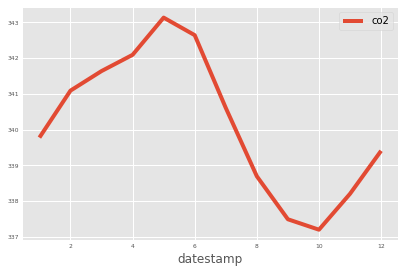

'\nBy plotting the mean CO2 levels data for each month, you can see how CO2 levels are high during the summer months, \nand lower during the winter months. This is because of the increased sunlight and CO2 production by plants!\n'

In [35]:
# ex 1
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

'''
By plotting the mean CO2 levels data for each month, you can see how CO2 levels are high during the summer months, 
and lower during the winter months. This is because of the increased sunlight and CO2 production by plants!
'''

## Compute numerical summaries

You have learnt how to display and annotate time series data in multiple ways, but it is also informative to collect summary statistics of your data. Being able to achieve this task will allow you to share and discuss statistical properties of your data that can further support the plots you generate. In pandas, it is possible to quickly obtain summaries of columns in your DataFrame by using the command:

```
print(df.describe())
```


In [54]:
# ex 5
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels['co2'].min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels['co2'].max())

               co2
count  2225.000000
mean    340.142247
std      17.003885
min     313.000000
25%     324.800000
50%     338.300000
75%     354.800000
max     373.900000
313.0
373.9


## Boxplots and Histograms

Boxplots represent a graphical rendition of the minimum, median, quartiles, and maximum of your data. You can generate a boxplot by calling the .boxplot() method on a DataFrame.

Another method to produce visual summaries is by leveraging histograms, which allow you to inspect the data and uncover its underlying distribution, as well as the presence of outliers and overall spread. An example of how to generate a histogram is shown below:

ax = co2_levels.plot(kind='hist', bins=100)

Here, we used the standard .plot() method but specified the kind argument to be 'hist'. In addition, we also added the bins=100 parameter, which specifies how many intervals (i.e bins) we should cut our data into.


No handles with labels found to put in legend.


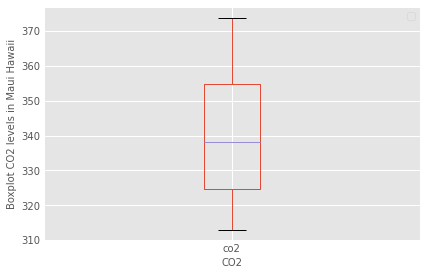

In [36]:
# ex 1
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

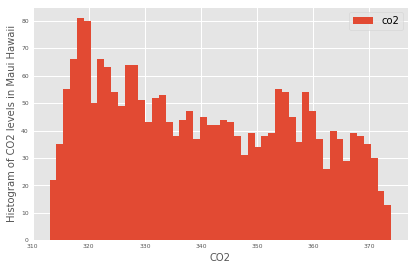

In [37]:
# ex 2
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

## Density plots

In practice, histograms can be a substandard method for assessing the distribution of your data because they can be strongly affected by the number of bins that have been specified. Instead, kernel density plots represent a more effective way to view the distribution of your data. An example of how to generate a density plot of is shown below:

```
ax = df.plot(kind='density', linewidth=2)
```

The standard .plot() method is specified with the kind argument set to 'density'. We also specified an additional parameter linewidth, which controls the width of the line to be plotted.

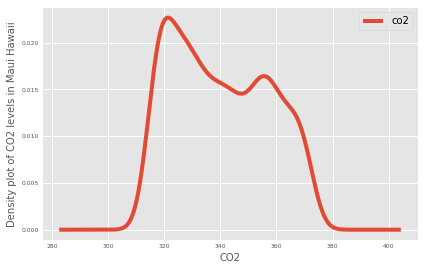

In [40]:
# ex 1
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()

# Chapter 3 :: Advanced time series analysis

## Autocorrelation and partial autocorrelation

Autocorrelation plots can be used to quickly discover patterns into your time series.       

**Autocorrelation in time series data**    

* Autocorrelation is measured as the correlation between a time series and a delayed copy of itself
* For example, an autocorrelation of order 3 returns the correlation between a time series          
  at points ( t_1 , t_2 , t_3 , ...) and its own values lagged by 3 time points, i.e. ( t_4 , t_5 , t_6 , ...)
* It is used to find repetitive patterns or periodic signal in time series

... more info [autocorrelation](https://www.dummies.com/programming/big-data/data-science/autocorrelation-plots-graphical-technique-for-statistical-data/)

In [ ]:
print(co2_levels.head)

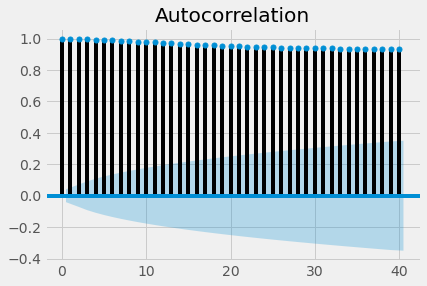

In [50]:
# ex 1
# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=40)

# Show plot
plt.show()

## Partial autocorrelation in time series data

Like autocorrelation, the partial autocorrelation function (PACF) measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends upon this idea by also removing the effect of previous time points. For example, a partial autocorrelation function of order 3 returns the correlation between our time series (t_1, t_2, t_3, ...) and its own values lagged by 3 time points (t_4, t_5, t_6, ...), but only after removing all effects attributable to lags 1 and 2.

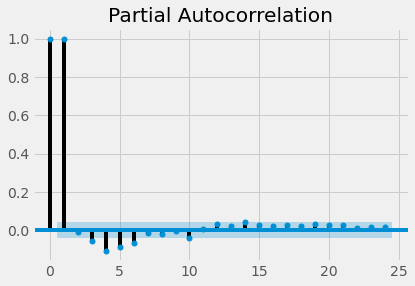

In [52]:
# ex 1
# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

## Time series decomposition

When visualizing time series data, you should look out for some distinguishable patterns:

    seasonality: does the data display a clear periodic pattern?
    trend: does the data follow a consistent upwards or downward slope?
    noise: are there any outlier points or missing values that are not consistent with the rest of the data?

You can rely on a method known as time-series decomposition to automatically extract and quantify the structure of time-series data. The ```statsmodels``` library provides the seasonal_decompose() function to perform time series decomposition out of the box. 

In [ ]:
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

# Time series decomposition is a powerful method to reveal the structure of your time series. Now let's visualize these components.

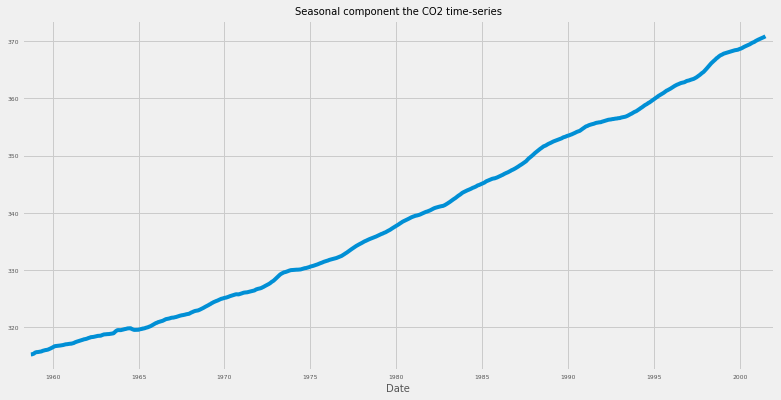

In [54]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

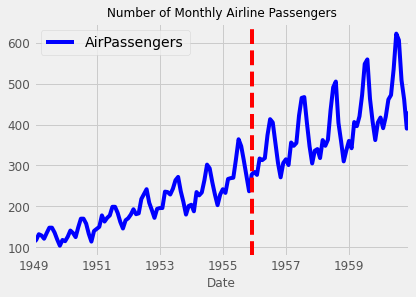

In [55]:
# Plot the time series in your dataframe
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

#The number of airline passengers has risen a lot over time. Can you find any interesting patterns in this time series?

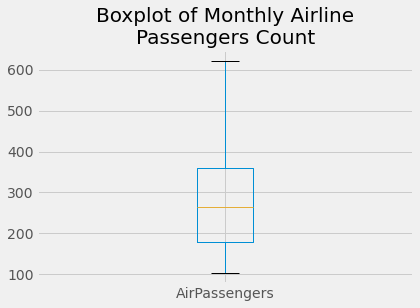

In [57]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

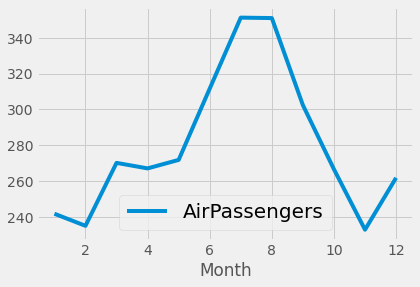

In [60]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

#  Looks like July and August are the busiest months!

In [ ]:
Time series decomposition of the airline dataset

In this exercise, you will apply time series decomposition to the airline dataset, and visualize the trend and seasonal componenets.

            trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


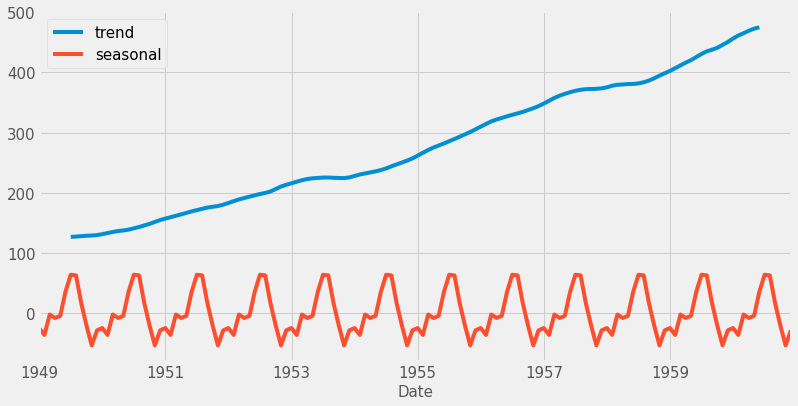

In [74]:
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)


# Extract the trend and seasonal components
#trend = decomposition.trend.rename(columns={"AirPassengers": "trend"})
#trend = decomposition.trend.reset_index(name ="AirPassengers")
trend = decomposition.trend
#seasonal = decomposition.seasonal.reset_index(name ="AirPassengers")
seasonal = decomposition.seasonal
airline_decomposed = pd.concat([trend, seasonal], axis=1)


# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head())

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()


# Chapter 4 :: Working with multiple time series

In [75]:

# Read in meat DataFrame
meat = pd.read_csv(url_meat)

# Review the first five lines of the meat DataFrame
print(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
print(meat.describe())

         date   beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
0  1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1  1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
2  1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
3  1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
4  1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

   turkey  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
              beef        veal         pork  lamb_and_mutton     broilers  \
count   827.000000  827.000000   827.000000       827.000000   635.000000   
mean   1683.463362   54.198549  1211.683797        38.360701  1516.582520   
std     501.698480   39.062804   371.311802        19.624340   963.012101   
min     366.000000    8.800000   124.000000        10.900000   250.900000   
25%    1231.500000   24.000000   934.500000        23.00

## Visualize multiple time series

If there are multiple time series in a single DataFrame, you can still use the .plot() method to plot a line chart of all the time series. Another interesting way to plot these is to use area charts. Area charts are commonly used when dealing with multiple time series, and can be used to display cumulated totals.

With the pandas library, you can simply leverage the .plot.area() method to produce area charts of the time series data in your DataFrame.

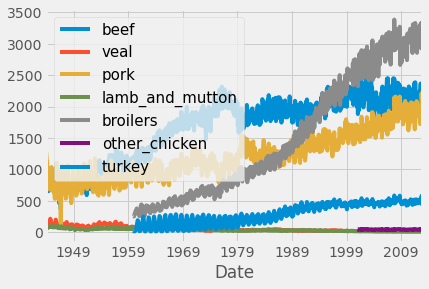

In [76]:
# ex 2
# Plot time series dataset
ax = meat.plot()

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

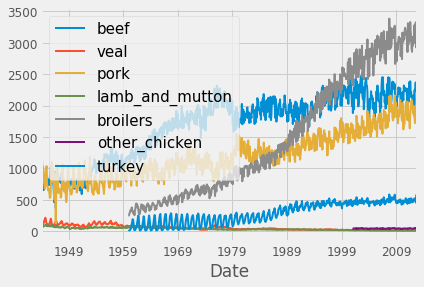

In [77]:
# ex 3
# Plot time series dataset
ax = meat.plot(linewidth=2, fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

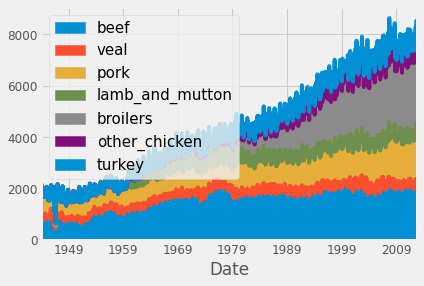

In [78]:
# ex4
# Plot an area chart
ax = meat.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

# It looks the time series in the meat DataFrame have very different growth rates!

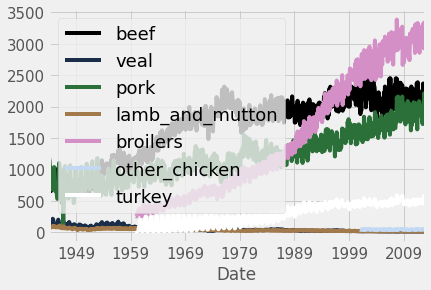

In [79]:
# ex 5
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

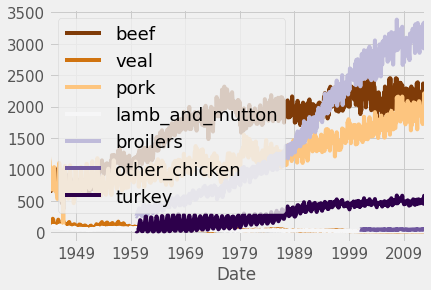

In [80]:
# ex 6
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='PuOr', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

## Add summary statistics to time series plot

It is possible to visualize time series plots and numerical summaries on one single graph by using the pandas API to matplotlib along with the table method:

In [83]:
# ex 7
meat_mean = pd.DataFrame(meat.mean()).T
print(meat_mean)
print(type(meat_mean))

          beef       veal         pork  lamb_and_mutton    broilers  \
0  1683.463362  54.198549  1211.683797        38.360701  1516.58252   

   other_chicken      turkey  
0      43.033566  292.814646  
<class 'pandas.core.frame.DataFrame'>


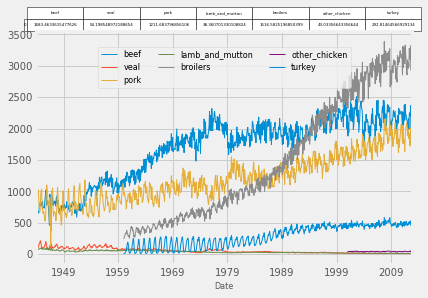

In [87]:
# Plot the meat data
ax = meat.plot(fontsize=10, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=8)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=8)

# Show plot
plt.show()

## Plot time series on individual plots


It can be beneficial to plot individual time series on separate graphs as this may improve clarity and provide more context around each time series in your DataFrame.

It is possible to create a "grid" of individual graphs by "faceting" each time series by setting the subplots argument to True. In addition, the arguments that can be added are:

    layout: specifies the number of rows x columns to use.
    sharex and sharey: specifies whether the x-axis and y-axis values should be shared between your plots.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001954832BBB0>,
      dtype=object)

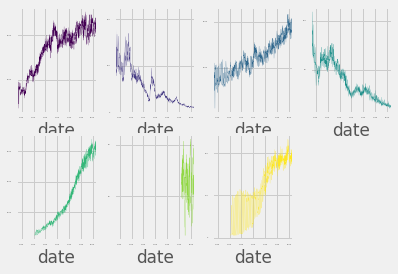

In [88]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout=(2,4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)

## Compute correlations between time series

The correlation coefficient can be used to determine how multiple variables (or a group of time series) are associated with one another. The result is a correlation matrix that describes the correlation between time series. Note that the diagonal values in a correlation matrix will always be 1, since a time series will always be perfectly correlated with itself.

Correlation coefficients can be computed with the pearson, kendall and spearman methods. A full discussion of these different methods is outside the scope of this course, but the pearson method should be used when relationships between your variables are thought to be linear, while the kendall and spearman methods should be used when relationships between your variables are thought to be non-linear.

In [89]:
# Compute the correlation between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.827587)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.827587


In [90]:
# Print the correlation matrix between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr(method='pearson'))

# Print the correlation between veal and pork columns
print(-0.808834)

# Print the correlation between veal and turkey columns
print(-0.768366)

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.808834
-0.768366


## Visualize correlation matrices

The correlation matrix generated in the previous exercise can be plotted using a heatmap. To do so, you can leverage the heatmap() function from the seaborn library which contains several arguments to tailor the look of your heatmap.
```
df_corr = df.corr()
sns.heatmap(df_corr)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
```
You can use the .xticks() and .yticks() methods to rotate the axis labels so they don't overlap. 

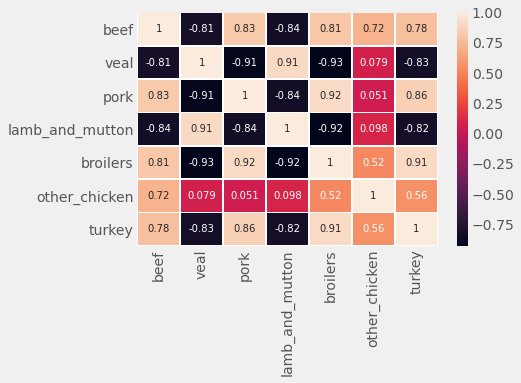

In [91]:
# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

## Clustered heatmaps

Heatmaps are extremely useful to visualize a correlation matrix, but clustermaps are better. A Clustermap allows to uncover structure in a correlation matrix by producing a hierarchically-clustered heatmap:

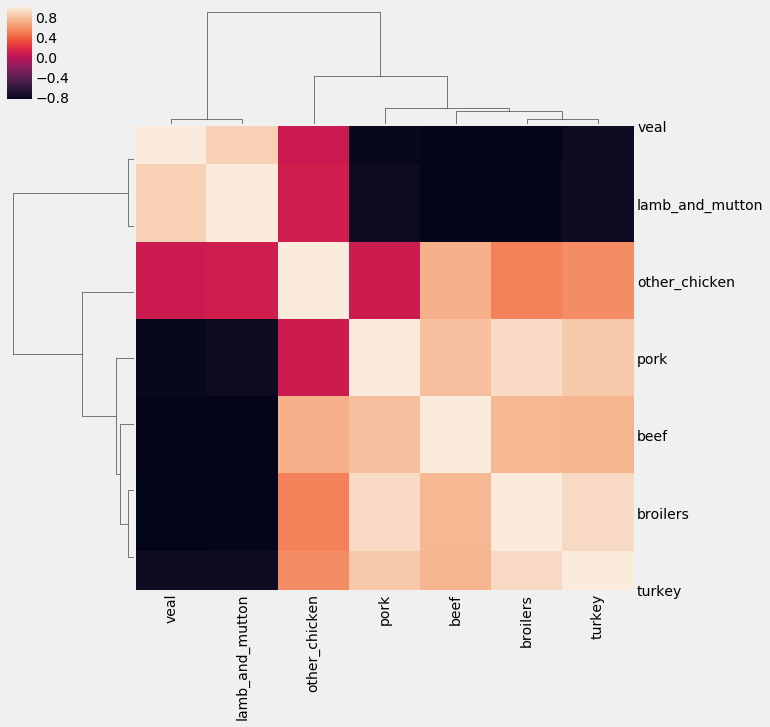

In [56]:
# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

# Chapter 5 :: CASE STUDY

In [94]:
# ex 1
# Read in jobs file
jobs = pd.read_csv(url_jobs)

# Print first five lines of your DataFrame
print(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

    datestamp  Agriculture  Business services  Construction  \
0  2000-01-01         10.3                5.7           9.7   
1  2000-02-01         11.5                5.2          10.6   
2  2000-03-01         10.4                5.4           8.7   
3  2000-04-01          8.9                4.5           5.8   
4  2000-05-01          5.1                4.7           5.0   

   Durable goods manufacturing  Education and Health  Finance  Government  \
0                          3.2                   2.3      2.7         2.1   
1                          2.9                   2.2      2.8         2.0   
2                          2.8                   2.5      2.6         1.5   
3                          3.4                   2.1      2.3         1.3   
4                          3.4                   2.7      2.2         1.9   

   Information  Leisure and hospitality  Manufacturing  Mining and Extraction  \
0          3.4                      7.5            3.6                    3.9

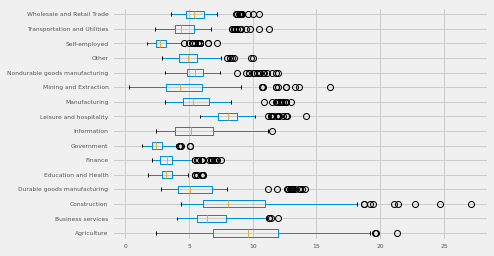

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


In [95]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print('Agriculture')

# Print the name of the time series with the highest variability
print('Construction')

            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


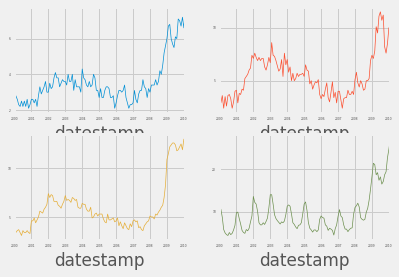

In [96]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head(5))

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

#The plots really show that there was a drastic increase in unemployment rate during in 2001 and 2008!

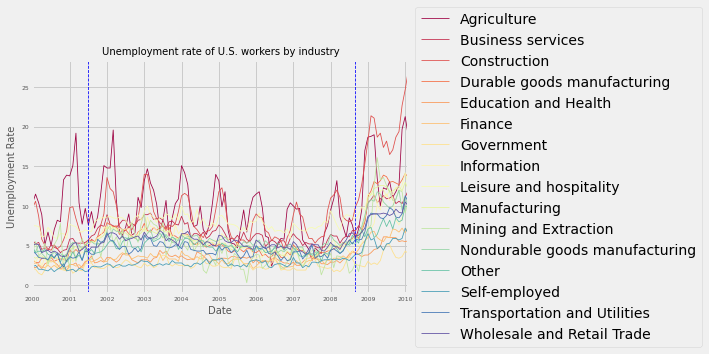

In [97]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

# Can you take a guess as to what caused the increase in unemployment rate in 2001 and 2008?

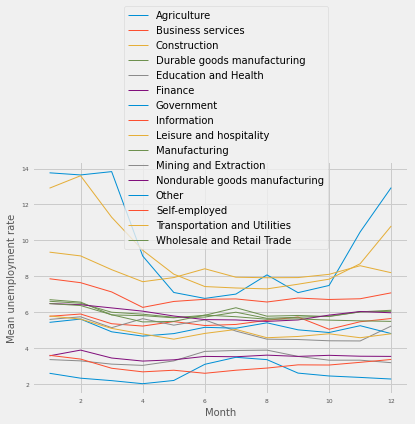

In [98]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

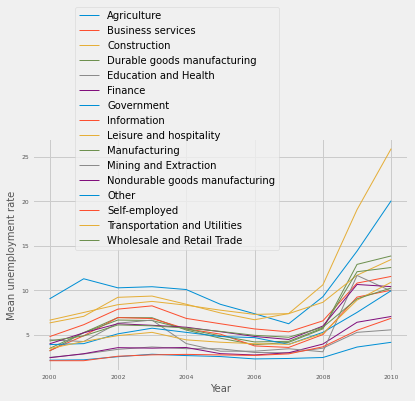

In [99]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()

# Averaging time series values by month shows that unemployment rate tends to be a lot higher during the winter months for the Agriculture and Construction industry. The increase in unemployment rate after 2008 is very clear when average time series values by year.

In [100]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

# You've performed time series decomposition on all the time series in the jobs DataFrame. Let's try and plot them!

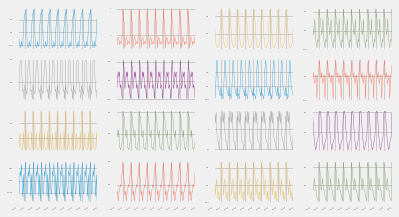

In [101]:
jobs_seasonal = {}

# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4,4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)

# Show plot
plt.show()

# Each time series in the jobs DataFrame have very different seasonality patterns!

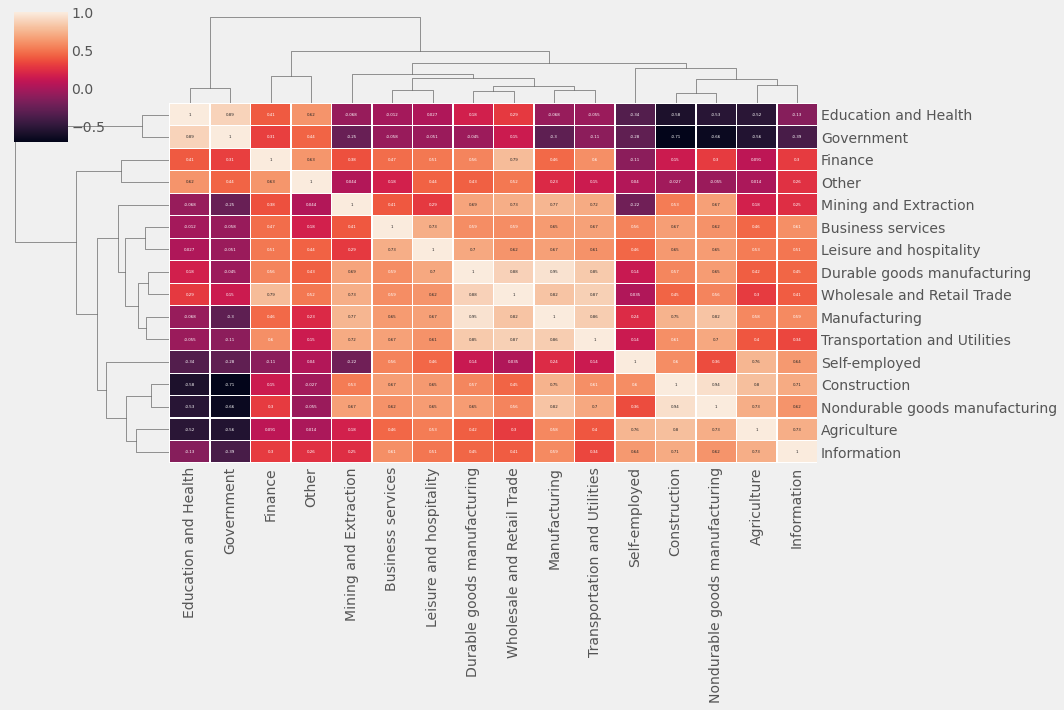

In [102]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()
